# Práctica 7: análisis de regresión lineal simple

## Recipe
El Análisis de Regresión nos permite descubrir si existe una relación entre una/s variable/s independiente/s y una variable dependiente (el objetivo). Por ejemplo, en una Regresión Lineal Simple queremos saber si hay una relación entre $x$ y $y$. Esto es muy útil en la predicción (por ejemplo, hacia dónde se dirige la tendencia) y en la modelización de series temporales (por ejemplo, niveles de temperatura por año y si el calentamiento global es cierto).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = 'diamonds.csv'
# Cargamos el conjunto de datos en un dataframe
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
df = df.drop(['Unnamed: 0'], axis=1)

In [36]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [79]:
# Definimos quién es X y quién y
X = df.iloc[:, [True, False, False, False, False, False, False, False, False, False]].values
y = df.iloc[:, [False, False, False, False, False, False, True, False, False, False, ]].values

In [80]:
X

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]])

In [81]:
y

array([[ 326],
       [ 326],
       [ 327],
       ...,
       [2757],
       [2757],
       [2757]], dtype=int64)

El objetivo general aquí es crear un modelo que prediga el salario basado en los años de experiencia. En primer lugar, crearemos un modelo utilizando el conjunto de entrenamiento (70% del conjunto de datos). Luego se ajustará a una línea que se aproxime lo más posible a la mayoría de los puntos de datos.

In [82]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [83]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.8491812623190488


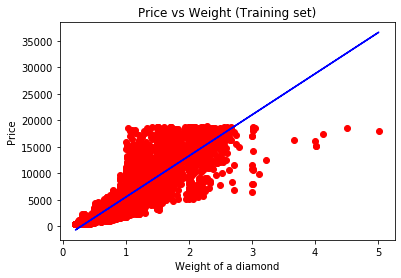

In [86]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_train, model.predict(X_train), color = 'blue') 
plt.title('Price vs Weight (Training set)') 
plt.xlabel('Weight of a diamond')
plt.ylabel('Price')
plt.show()

Después de encontrar la relación entre X y y, en forma lineal, aplicamos esa misma línea al cojunto de datos Test (el 30% restante o 1/3 del conjunto de datos).

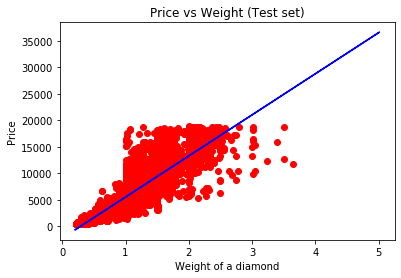

In [88]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Price vs Weight (Test set)')
plt.xlabel('Weight of a diamond')
plt.ylabel('Price')
plt.show()

### Validación cruzada (Cross Validation)
Es muy similar a la división de train/test, pero se aplica a más subconjuntos. Es decir, dividimos nuestros datos en subconjuntos $k$, y entrenamos en $k-1$ uno de esos subconjuntos. Lo que hacemos es mantener el último subconjunto para la prueba. Podemos hacerlo para cada uno de los subconjuntos.

Hay un muchos de métodos de validación cruzada, entre ellos: la validación cruzada de volúmenes K (K-Folds Cross Validation) y la validación cruzada de salida (Leave One Out Cross Validation, LOOCV)

### K-Folds Cross Validation
En la validación cruzada de K-Folds dividimos nuestros datos en k diferentes subconjuntos (o volúmenes). Utilizamos subconjuntos $k-$1 para entrenar nuestros datos y dejamos el último subconjunto (o el último pliegue) como datos de prueba. Luego promediamos el modelo contra cada uno de los pliegues y luego finalizamos nuestro modelo. Después de eso lo probamos contra el conjunto de prueba.

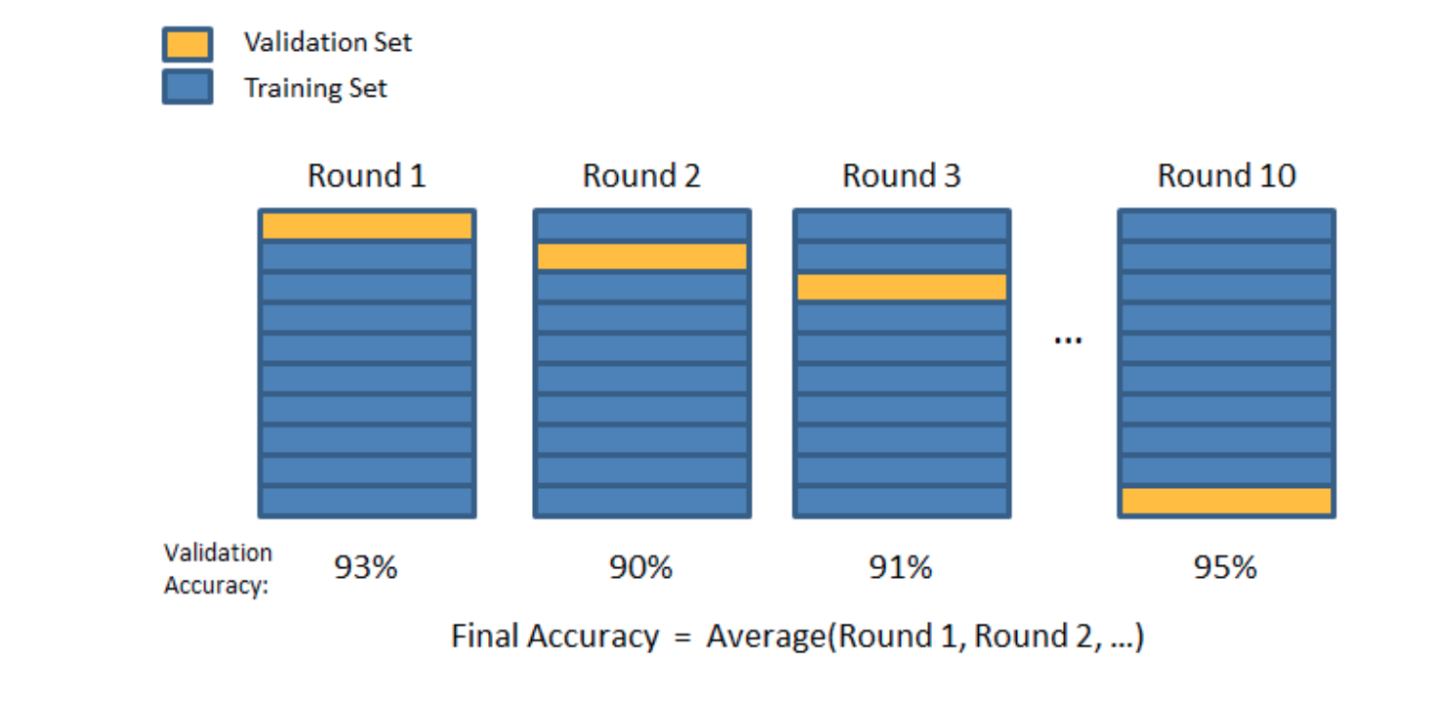

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [100]:
kf = KFold(n_splits=10, shuffle=True, random_state=123)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Desepeño de cross-validation con 10 volúmenes:", cv_scores.mean())

Desepeño de cross-validation con 10 volúmenes: 0.8492112656260946
